In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("cars.xls")

In [7]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
with pd.ExcelWriter("arabadeneme.xlsx") as writer:   #dosyayı excel olarak kaydetme ve sheetlere df1 df2 lerı kaydedebılırız. #grafıkler de excele donusturulebılıyor

    df.to_excel(writer, sheet_name="Sheet1")

    df.to_excel(writer, sheet_name="Sheet2")

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
import matplotlib.pyplot as plt

In [10]:
x=df[["Price", "Mileage", "Cylinder"]]

In [11]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [12]:
model=KMeans(n_clusters=5)

In [13]:
model=model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
tahmin=model.predict(x)

In [15]:
tahmin

array([3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 3,
       3, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 3, 3, 1, 1,
       1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 1, 1, 1, 1,
       1, 1, 4, 4, 3, 3, 3, 3, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 1, 1,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 1, 1, 1, 1, 4, 4,
       4, 4, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3,
       3, 1, 1, 4, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 1, 1, 1, 1,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3,

In [16]:
x['cluster']=tahmin

<ipython-input-16-b368ff04539a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=tahmin


In [17]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,3
1,17542.036083,9135,6,3
2,16218.847862,13196,6,3
3,16336.913140,16342,6,1
4,16339.170324,19832,6,1


In [18]:
x['cluster'].unique()

array([3, 1, 4, 0, 2], dtype=int32)

In [19]:
silhouette_score(x, tahmin)    #4 gruba ayirdi birbirine benzerligine bakiyor

0.35465905843352813

#4 grubu benzerlıklerıne gore ayırdı

her grubun bır centraıdı var

hangı ılcede ne kadar market acarsan kar edersın

daha fazla acarsan zarar edersın nerde durman gerektıgını soyluyor sana

benzerlıklerıne gore belırledıgı yerınortası yanı konumu oluyor.

enlem boylam verıp en az masrafla buraya getırebılırsınız dıyor

#### Elbow Method - Dirsek Metodu  (siluet scoretu 1-den 10 a kadar farklı gruplara ayır dırsek nerde kırılmaya baslarsa o kadar gruba ayırmanız gerekır)

#### biz 4 dedik ama 4te haklı mıyız onu anlıycaz

In [20]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 3,
       3, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 3, 3, 1, 1,
       1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 1, 1, 1, 1,
       1, 1, 4, 4, 3, 3, 3, 3, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 1, 1,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 1, 1, 1, 1, 4, 4,
       4, 4, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3,
       3, 1, 1, 4, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 1, 1, 1, 1,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 3,

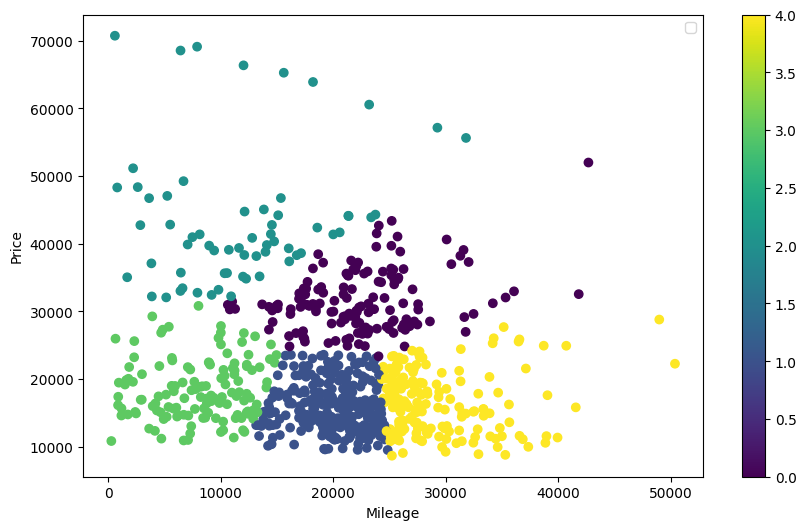

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage, x.Price, c=tahmin)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend()
plt.colorbar()
plt.show()
#grafıkte 5 farklı renk goruyoruz
#fıyatı dusuk km sı dusuk mavı , fıyatı dusuk kmsı yuksek mor , fıyatı yuksek kmsı yuksek sarı,
#fıyatı yuksek kmsı dusuk yesıl ama rnkler deıgısyıor grafıkte
#mileage price grubuna ayırdı.
#burada price ve mileagea baktık

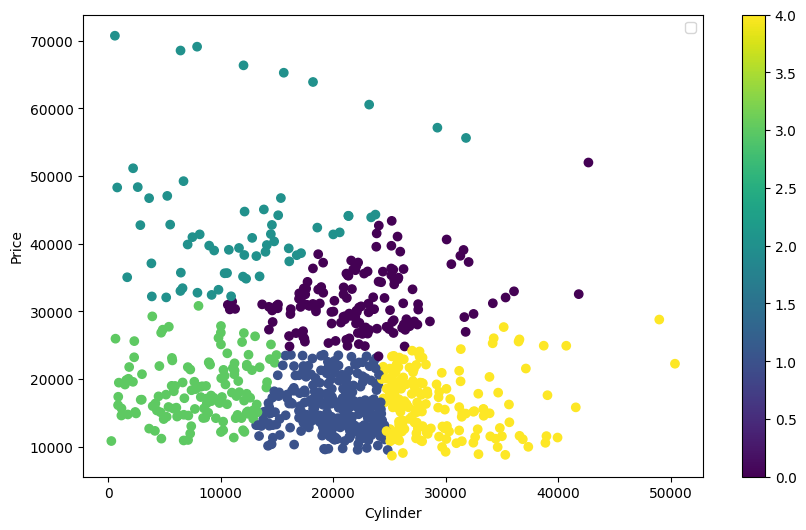

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage, x.Price, c=tahmin)
plt.xlabel("Cylinder")  #burada Cylinder ve price a baktik
plt.ylabel("Price")
plt.legend()
plt.colorbar()
plt.show()

In [23]:
import numpy as np

In [24]:
# Predicticting the silhouette score for each clusters

allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters):
    for no_of_cluster in np.arange(1,clusters):   # 1 den clustera kadar say phyton sıfırdan sayfamaya baslar burada 1 yazdık 2 den saymaya baslamıs oldu. 1 den 9 a kadar cluster saymıs oldu
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)   #1-9 kadar yapıyor her seferınde 1 ıcın 2 ıcın vs.
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)  #benzerlıgıne bakıyor
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

#r2 de regressıonda r2 ne kadar buyukse basarı oranı artıyordu burada dusme nerde durursa ıdeal olan grup sayısı o oluyor. dusme onemlı burada.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of cluster 2,silhouette0.4517011866464823
Number of cluster 3,silhouette0.41321085683945025


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of cluster 4,silhouette0.41335292362567566
Number of cluster 5,silhouette0.3550640921112875


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of cluster 6,silhouette0.34707133925104494
Number of cluster 7,silhouette0.35751612822313383


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of cluster 8,silhouette0.36256592270439725
Number of cluster 9,silhouette0.34858733010005244


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##değişmeyi bıraktıgı yerde bırakıyoruz o da sonrasında hep 0.36, 0.36 dıye devam ettıgı ıcın almıyoruz artık ondan sonrasını

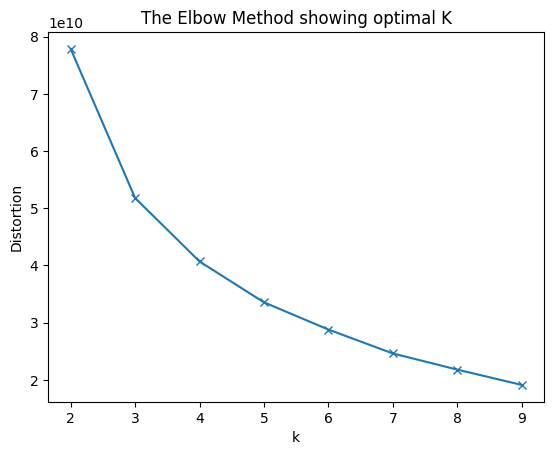

In [25]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() #4 te kırılma olmuş, kırılma noktası, elbow metodu nerede kırılma varsa cluster yapıyoruz?
#DİRSEK 4 TE KIRILMIS  5 INCI MARKETI ACARSAK ZARARDAYIZ
#4 te dıkeyden yataya dogru donmus o yuzden 4 gruba ayırdık

In [26]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [27]:
x

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,3
1,17542.036083,9135,6,3
2,16218.847862,13196,6,3
3,16336.913140,16342,6,1
4,16339.170324,19832,6,1
...,...,...,...,...
799,16507.070267,16229,6,1
800,16175.957604,19095,6,1
801,15731.132897,20484,6,1
802,15118.893228,25979,6,4


In [28]:
d={0:"Ucuz ve az km", 1:"Ucuz ve cok km", 2:"Pahalı ve az km", 3:"Pahalı ve cok km-orta"}   #dictionary  00,01,10,11

x["isim"]=x['cluster'].map(d)

<ipython-input-28-3e13e0133656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["isim"]=x['cluster'].map(d)


In [30]:
#bu 3 kolona bakip 3 kolon arasindaki iliskiyi grupladi- cluster 0 1 2 3

In [29]:
x

,Price,Mileage,Cylinder,cluster,isim
0,17314.103129,8221,6,3,Pahalı ve cok km-orta
1,17542.036083,9135,6,3,Pahalı ve cok km-orta
2,16218.847862,13196,6,3,Pahalı ve cok km-orta
3,16336.913140,16342,6,1,Ucuz ve cok km
4,16339.170324,19832,6,1,Ucuz ve cok km
...,...,...,...,...,...
799,16507.070267,16229,6,1,Ucuz ve cok km
800,16175.957604,19095,6,1,Ucuz ve cok km
801,15731.132897,20484,6,1,Ucuz ve cok km
802,15118.893228,25979,6,4,NaN


In [31]:
#silhouette SCORE İLE KAC GRUBA AYIRMAMIZ GEREKTIGINE BAKIYORUZ